<a href="https://colab.research.google.com/github/Jiasha-nath/Yield-Prediction/blob/main/GP_yield.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib

In [ ]:
files = [
    'AGRA CCE PARAMETERS WITH GP CROP AREA.xlsx',
    'CCE_with_all_Parameters_Alwar_Nitin.xlsx',
    'Kushinagar_Deoria_CCE_Mustard.xlsx'
]

In [ ]:
data_frames = [pd.read_excel(file) for file in files]
data = pd.concat(data_frames, ignore_index=True)

In [ ]:
X = data[['NDVI', 'NDWI', 'FAPAR', 'LAI', 'LSWI']]
y = data['Yield(kg/25m2)']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest Regression': RandomForestRegressor(n_estimators=100, random_state=42),
    'Decision Tree Regression': DecisionTreeRegressor(random_state=42),
    'Gradient Boosting Regression': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'K-Nearest Neighbour': KNeighborsRegressor(n_neighbors=5)
}

In [ ]:
results = {}
predictions = {}

In [ ]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {'Mean Squared Error': mse, 'R2 Score': r2}
    predictions[name] = y_pred
    joblib.dump(model, f'{name.replace(" ", "_")}.joblib')


In [ ]:
    print(f'{name}:')
    print(f'  Mean Squared Error: {mse}')
    print(f'  R2 Score: {r2}\n')

K-Nearest Neighbour:
  Mean Squared Error: 1.7082876068148147
  R2 Score: 0.21686718710059882



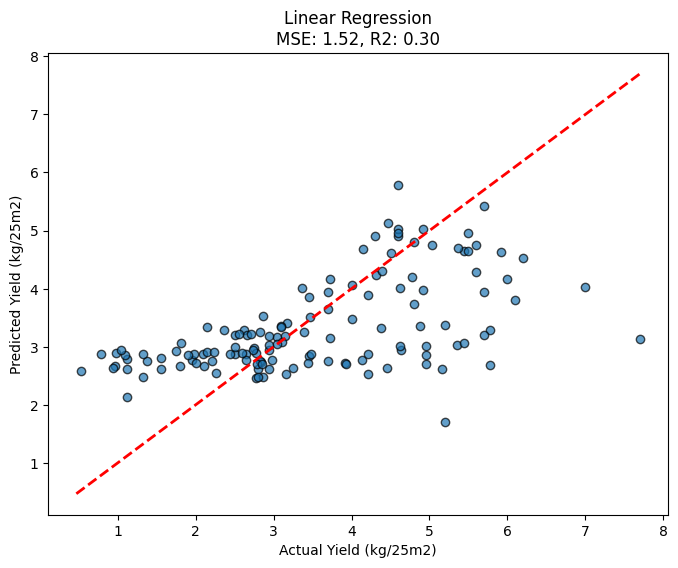

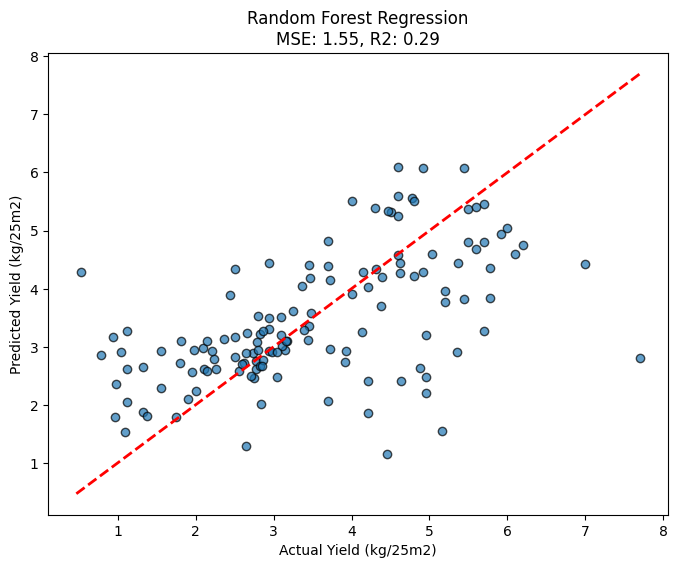

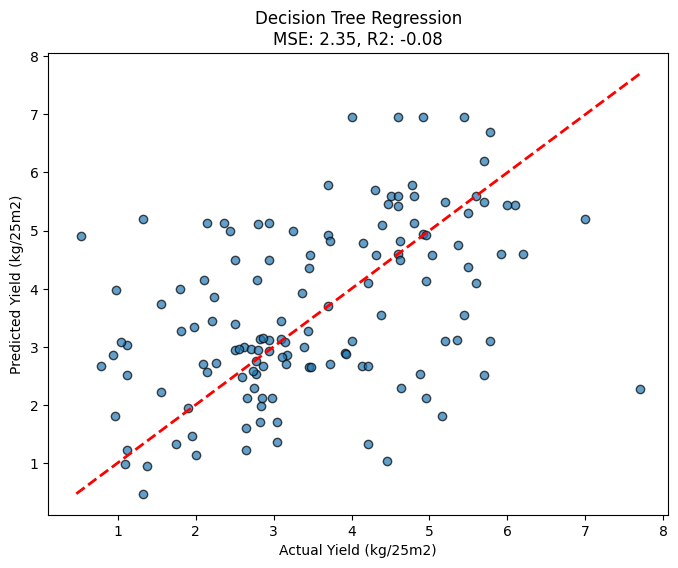

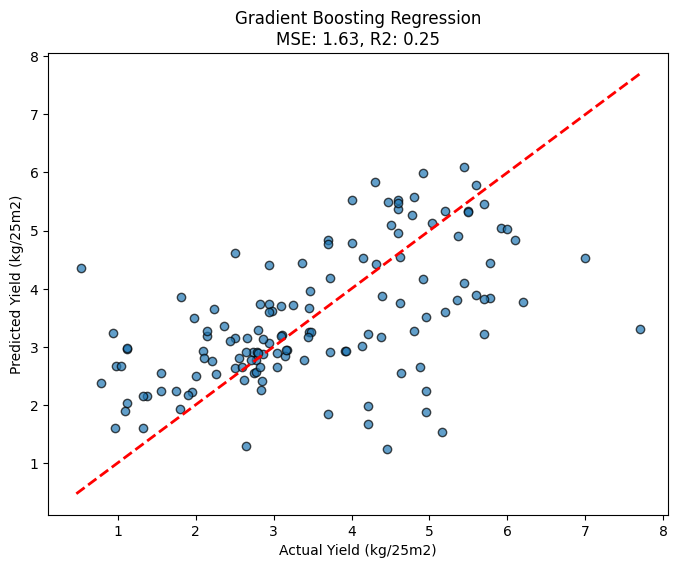

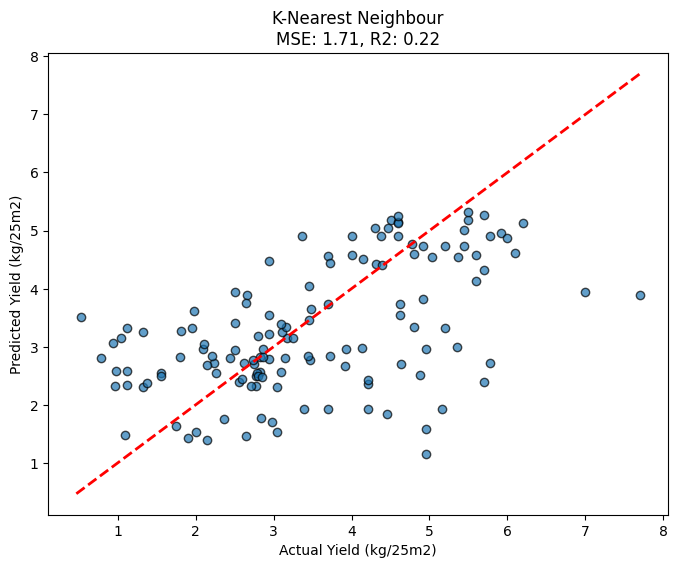

In [ ]:
for name, y_pred in predictions.items():
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, edgecolor='k', alpha=0.7)
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
    plt.xlabel('Actual Yield (kg/25m2)')
    plt.ylabel('Predicted Yield (kg/25m2)')
    plt.title(f'{name}\nMSE: {results[name]["Mean Squared Error"]:.2f}, R2: {results[name]["R2 Score"]:.2f}')
    plt.show()

In [ ]:
for name, metrics in results.items():
    print(f'{name}:')
    print(f'  Mean Squared Error: {metrics["Mean Squared Error"]}')
    print(f'  R2 Score: {metrics["R2 Score"]}\n')

Linear Regression:
  Mean Squared Error: 1.520122181475064
  R2 Score: 0.30312814119806963

Random Forest Regression:
  Mean Squared Error: 1.5522654438814807
  R2 Score: 0.28839265789673274

Decision Tree Regression:
  Mean Squared Error: 2.3549686518518524
  R2 Score: -0.07959176034376991

Gradient Boosting Regression:
  Mean Squared Error: 1.6328007168072074
  R2 Score: 0.251472753676657

K-Nearest Neighbour:
  Mean Squared Error: 1.7082876068148147
  R2 Score: 0.21686718710059882

